In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


In [2]:
# please use you local csv !!!

df = pd.read_csv('/content/df_166m.csv')
df.shape

(9977, 45)

In [3]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 9977 non-null   datetime64[ns]
 1   accelX(g)                 9977 non-null   float64       
 2   accelY(g)                 9977 non-null   float64       
 3   accelZ(g)                 9977 non-null   float64       
 4   accelUserX(g)             9977 non-null   float64       
 5   accelUserY(g)             9977 non-null   float64       
 6   accelUserZ(g)             9977 non-null   float64       
 7   gyroX(rad/s)              9977 non-null   float64       
 8   gyroY(rad/s)              9977 non-null   float64       
 9   gyroZ(rad/s)              9977 non-null   float64       
 10  Roll(rads)                9977 non-null   float64       
 11  Pitch(rads)               9977 non-null   float64       
 12  Yaw(rads)           

In [5]:
df['on_lift'].unique()

array([1, 0])

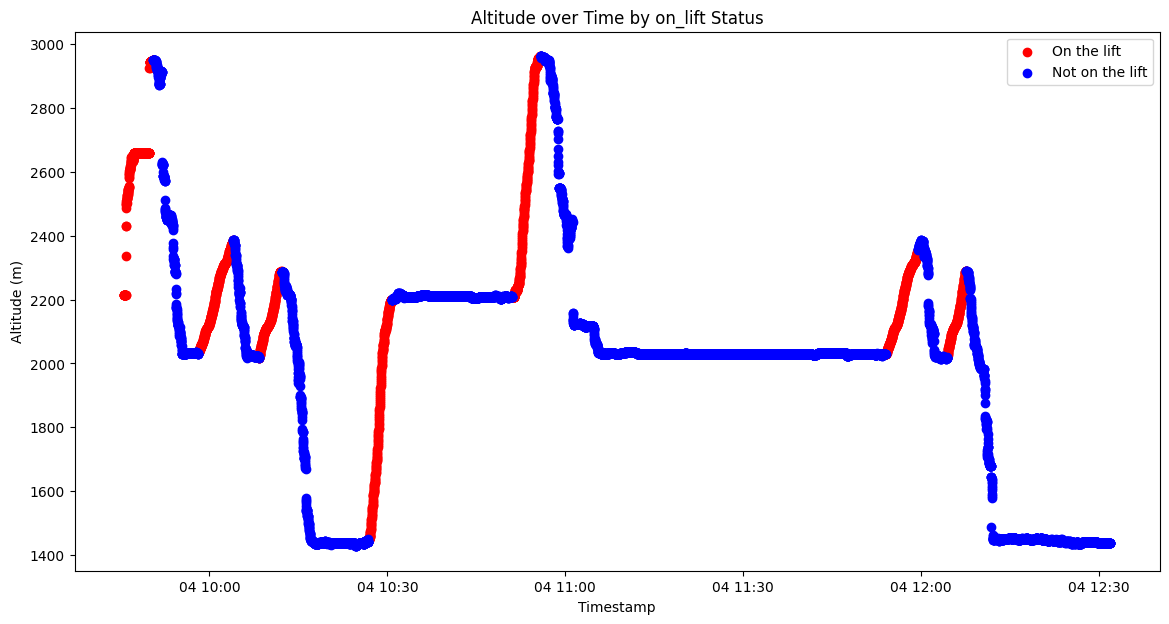

In [6]:
# Plot for Altitude over Time, colored by 'on_lift' status
plt.figure(figsize=(14, 7))

# Plot points where 'on_lift' is 1 with one color
plt.scatter(df.loc[df['on_lift'] == 1, 'Timestamp'],
            df.loc[df['on_lift'] == 1, 'Alt(m)'],
            c='red',
            label='On the lift',
            marker='o')

# Plot points where 'on_lift' is 0 with another color
plt.scatter(df.loc[df['on_lift'] == 0, 'Timestamp'],
            df.loc[df['on_lift'] == 0, 'Alt(m)'],
            c='blue',
            label='Not on the lift',
            marker='o')

plt.title('Altitude over Time by on_lift Status')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.legend()
plt.show()

### Feature Engineering

In [7]:
df['Course_change'] = df['Course'].diff().fillna(0)
df['Course_change']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9972    0.0
9973    0.0
9974    0.0
9975    0.0
9976    0.0
Name: Course_change, Length: 9977, dtype: float64

### Data Splitting

In [8]:
features=[
    # 'accelX(g)', 'accelY(g)', 'accelZ(g)',
    'accelUserX(g)','accelUserY(g)', 'accelUserZ(g)',
    'gyroX(rad/s)', 'gyroY(rad/s)','gyroZ(rad/s)',
    # 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)',
    # 'm11', 'm12','m13', 'm21', 'm22', 'm23', 'm31', 'm32', 'm33',
    # 'qX', 'qY', 'qZ', 'qW',
    # 'Lat', 'Long',
    'Speed(m/s)',
    # 'TrueHeading',
    # 'Alt(m)',
    # 'HorizontalAccuracy(m)', 'VerticalAccuracy(m)',
    'Course',
    # 'ActivityType', 'ActivityConfidence',
    # 'Pressure(kilopascals)',
    # 'RelativeAltitude(meters)',
    # 'magX(µT)', 'magY(µT)', 'magZ(µT)',
    'calMagX(µT)', 'calMagY(µT)', 'calMagZ(µT)',
    #'Cluster_1',
    # 'on_lift',
    # 'Course_change'
]

X=df[features]
y = df['on_lift']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

X.shape

(9977, 11)

### Modelling

In [9]:
# Create a pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42,
                                      max_iter=1000,
                                     ))
])

# Fit the pipeline to the training data
pipeline_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline_lr.predict(X_test)

### Evaluation

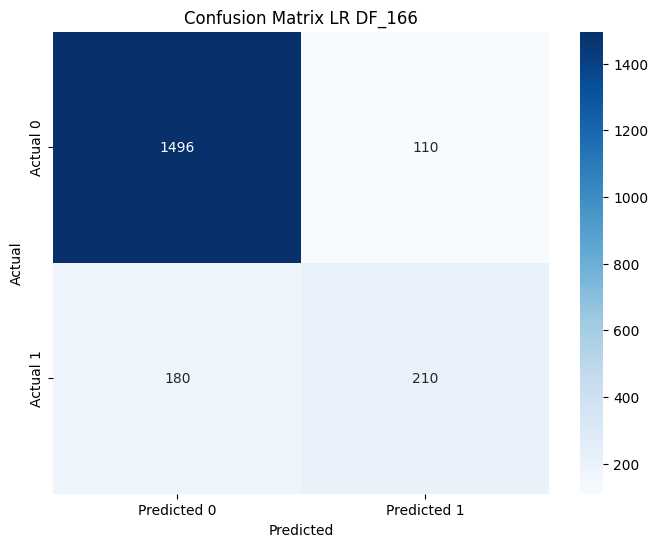

Accuracy: 0.85
Precision: 0.66
Recall: 0.54
F1-Score: 0.59


In [10]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate other classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LR DF_166')
plt.show()

# Display other classification metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

In [11]:
import plotly.express as px

# Create a DataFrame for 'on_lift' status
df_on_lift = df[df['on_lift'] == 1]
df_not_on_lift = df[df['on_lift'] == 0]

# Create scatter plots for 'on_lift' and 'not on_lift' status
fig = px.scatter(df_on_lift, x='Timestamp', y='Alt(m)', color_discrete_sequence=['red'], labels={'Alt(m)': 'Altitude (m)'}, title='Altitude over Time by on_lift Status (On the lift)')
fig.add_trace(px.scatter(df_not_on_lift, x='Timestamp', y='Alt(m)', color_discrete_sequence=['blue'], labels={'Alt(m)': 'Altitude (m)'}, title='Altitude over Time by on_lift Status (Not on the lift)').data[0])

# Customize the layout
fig.update_layout(
    xaxis_title='Timestamp',
    yaxis_title='Altitude (m)',
    showlegend=True,
    legend_title='Status',
)

# Show the Plotly figure
fig.show()


In [12]:
features1=[
    'accelX(g)', 'accelY(g)', 'accelZ(g)',
    'accelUserX(g)','accelUserY(g)', 'accelUserZ(g)',
    'gyroX(rad/s)', 'gyroY(rad/s)','gyroZ(rad/s)',
    'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)',
    'm11', 'm12','m13', 'm21', 'm22', 'm23', 'm31', 'm32', 'm33',
    'qX', 'qY', 'qZ', 'qW',
    'Lat', 'Long',
    'Speed(m/s)',
    'TrueHeading',
    'Alt(m)',
    'HorizontalAccuracy(m)', 'VerticalAccuracy(m)',
    'Course',
    #'ActivityType', 'ActivityConfidence',
    'Pressure(kilopascals)',
    'RelativeAltitude(meters)',
    'magX(µT)', 'magY(µT)', 'magZ(µT)',
    'calMagX(µT)', 'calMagY(µT)', 'calMagZ(µT)',
    #'Cluster_1',
    # 'on_lift'
]

X_1=df[features]
y_1 = df['on_lift']

In [13]:
# Predict on df 166
y_pred1 = pipeline_lr.predict(X_1)

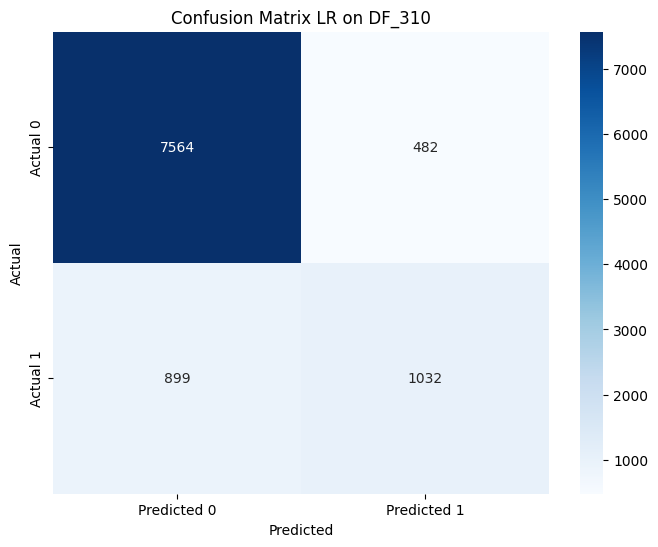

Accuracy_166: 0.86
Precision_166: 0.68
Recall_166: 0.53
F1-Score_166: 0.60


In [14]:
# Calculate the confusion matrix
conf_matrix_1 = confusion_matrix(y_1, y_pred1)

# Calculate other classification metrics
accuracy_1 = accuracy_score(y_1, y_pred1)
precision_1 = precision_score(y_1, y_pred1)
recall_1 = recall_score(y_1, y_pred1)
f1_1 = f1_score(y_1, y_pred1)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LR on DF_310')
plt.show()

# Display other classification metrics
print(f"Accuracy_166: {accuracy_1:.2f}")
print(f"Precision_166: {precision_1:.2f}")
print(f"Recall_166: {recall_1:.2f}")
print(f"F1-Score_166: {f1_1:.2f}")

In [18]:
df['Predicted']=y_pred1

In [16]:
df.head()

,Timestamp,accelX(g),accelY(g),accelZ(g),accelUserX(g),accelUserY(g),accelUserZ(g),gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),...,Pressure(kilopascals),RelativeAltitude(meters),magX(µT),magY(µT),magZ(µT),calMagX(µT),calMagY(µT),calMagZ(µT),on_lift,Course_change
0,2024-02-04 09:45:35,0.1922,-0.3479,-0.9826,0.0070,0.1008,0.0347,-0.2991,0.1544,-0.0899,...,76.1190,0.0000,453.5881,-134.0068,-256.9979,-9.0679,-27.6036,-45.7127,1,0.0
1,2024-02-04 09:45:36,0.0908,-0.3970,-0.6866,-0.0714,0.0364,0.2205,0.2636,-0.0981,0.1425,...,76.1190,0.0000,454.2118,-134.6189,-255.8427,-8.6285,-27.0907,-45.4847,1,0.0
2,2024-02-04 09:45:37,0.0375,-0.3651,-0.9360,-0.0546,0.0005,-0.0351,0.3272,-0.2148,0.1573,...,76.1097,0.9802,440.7044,-129.3311,-257.2758,-22.6558,-22.7829,-46.3289,1,0.0
3,2024-02-04 09:45:38,0.0144,-0.2673,-0.8922,-0.0412,-0.0190,0.0732,0.0626,0.0634,0.2389,...,76.1004,1.9604,439.4838,-126.7298,-256.5003,-23.4059,-19.9219,-45.7558,1,0.0
4,2024-02-04 09:45:39,0.1912,-0.4596,-0.8941,0.0340,-0.0016,-0.0177,-0.3062,-0.1541,-0.4590,...,76.0811,3.9846,447.4849,-140.8846,-252.6759,-15.0221,-33.9742,-42.2803,1,0.0


In [19]:
import plotly.express as px

# Create a DataFrame for 'on_lift' status
df_on_lift = df[df['Predicted'] == 1]
df_not_on_lift = df[df['Predicted'] == 0]

# Create scatter plots for 'on_lift' and 'not on_lift' status
fig = px.scatter(df_on_lift, x='Timestamp', y='Alt(m)', color_discrete_sequence=['red'], labels={'Alt(m)': 'Altitude (m)'}, title='Altitude over Time by on_lift Status (On the lift)')
fig.add_trace(px.scatter(df_not_on_lift, x='Timestamp', y='Alt(m)', color_discrete_sequence=['blue'], labels={'Alt(m)': 'Altitude (m)'}, title='Altitude over Time by on_lift Status (Not on the lift)').data[0])

# Customize the layout
fig.update_layout(
    xaxis_title='Timestamp',
    yaxis_title='Altitude (m)',
    showlegend=True,
    legend_title='Status',
)

# Show the Plotly figure
fig.show()